Made by Rebeca Amor

Objetivo del trabajo: modificar la imagen del frame de un anime para que se asemeje lo máximo posible a la versión original de su manga.

Obra: Spy x Family



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Para realizar esta práctica he utilizado las herramientas de OpenCV
# Cargo la imagen que quiero convertir
# Los notebooks en Colab a veces son muy tiquis miquis, así que hay que poner esto para que furrule el Opencv en Colab -_-"
!curl -o anime https://fotografias-neox.atresmedia.com/clipping/cmsimages01/2022/05/23/7CF04EFA-A416-4934-B12D-267B73859440/spy-family_98.jpg?crop=1920,1080,x0,y0&width=1900&height=1069&optimize=high&format=webply
img=cv2.imread('anime', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  200k  100  200k    0     0  2254k      0 --:--:-- --:--:-- --:--:-- 2254k


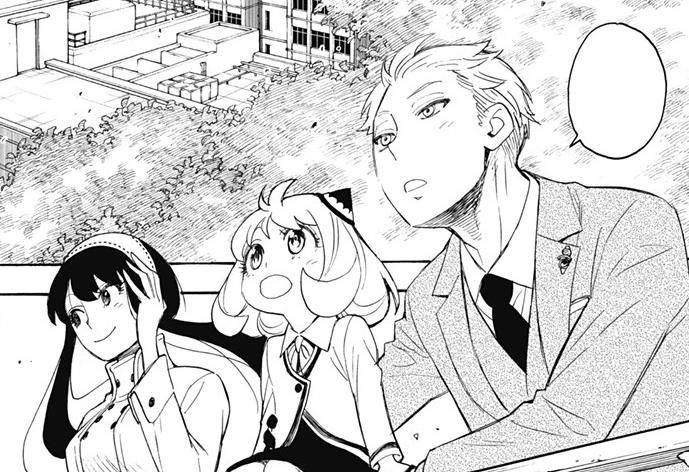

In [ ]:
# Cargo la imagen del manga para ver qué queremos conseguir
!curl -o anime https://pbs.twimg.com/media/FFpA7UsXMAQ5RHP?format=png&name=900x900
imgmanga=cv2.imread('anime', cv2.IMREAD_UNCHANGED)
cv2_imshow(imgmanga)
cv2.waitKey(0)
cv2.destroyAllWindows()

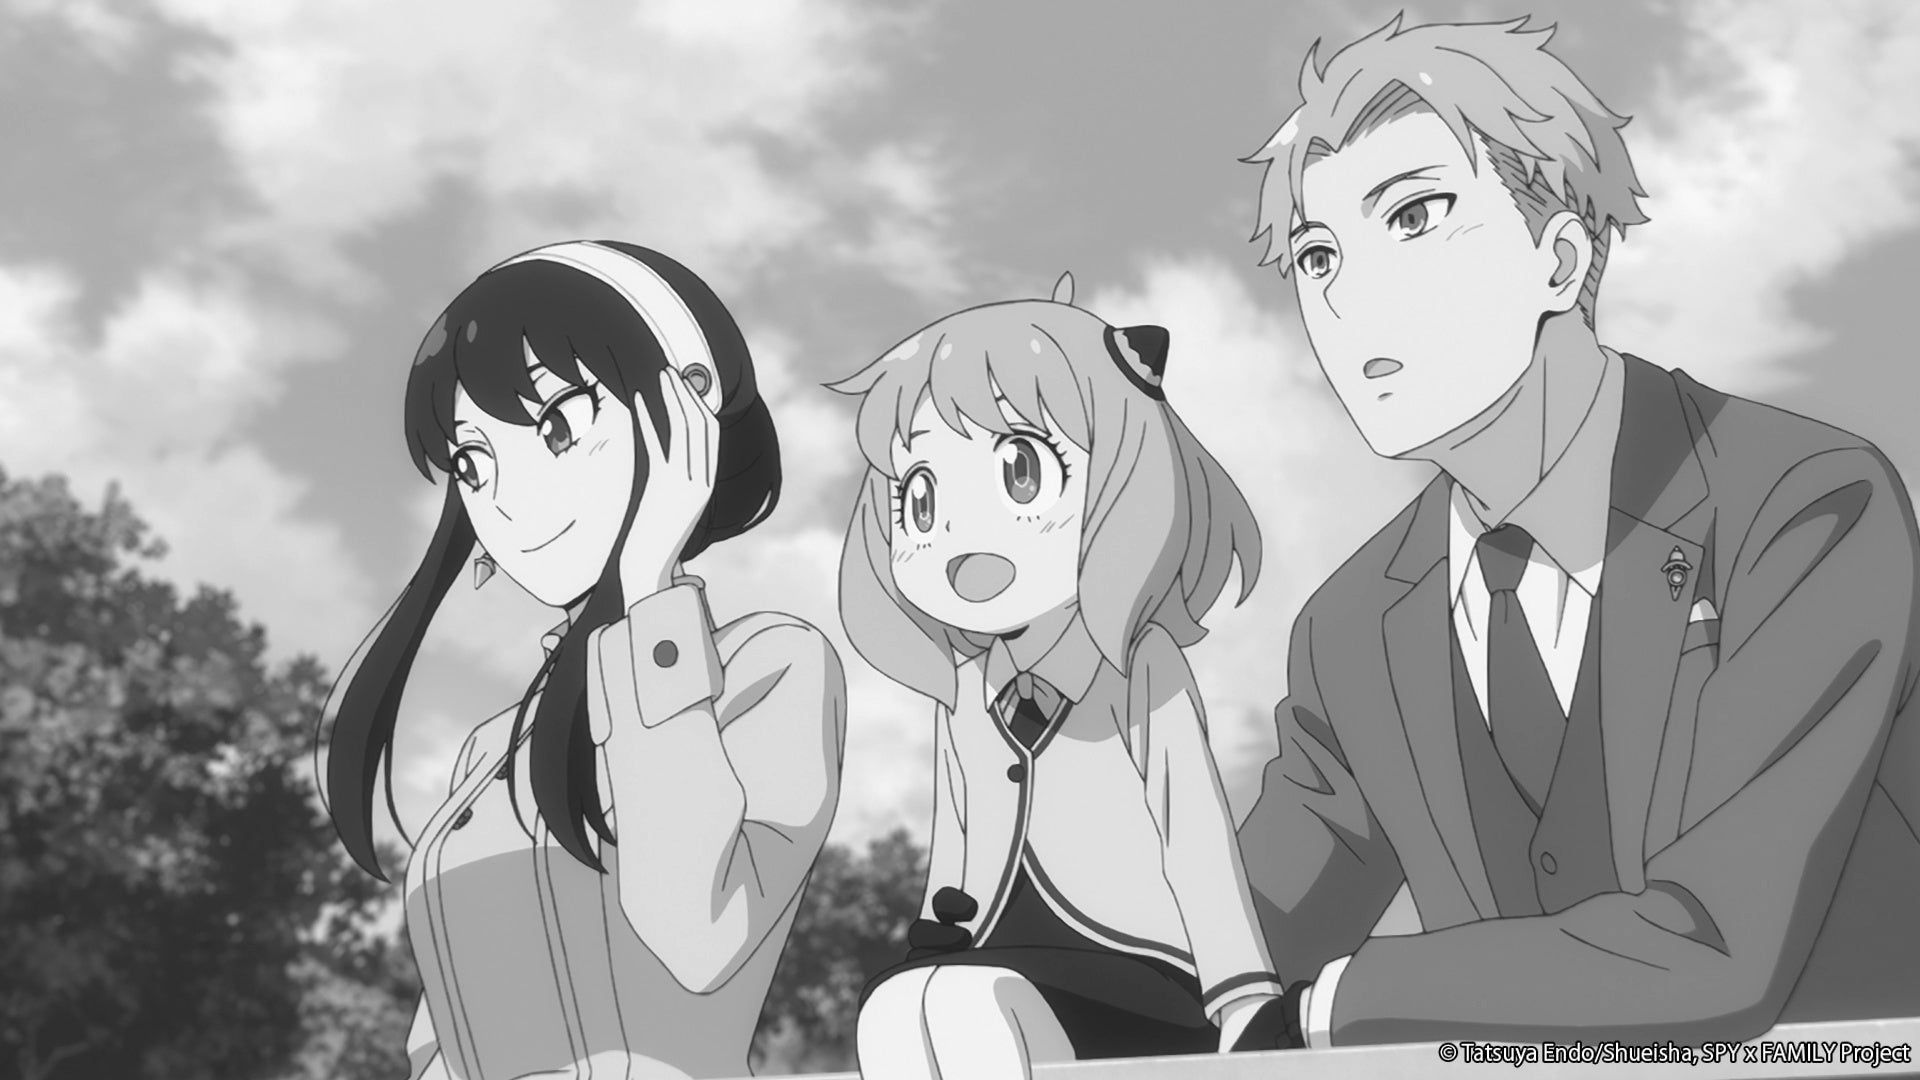

In [ ]:
# Primero, pasamos a escala de grises la imagen
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grey_img)

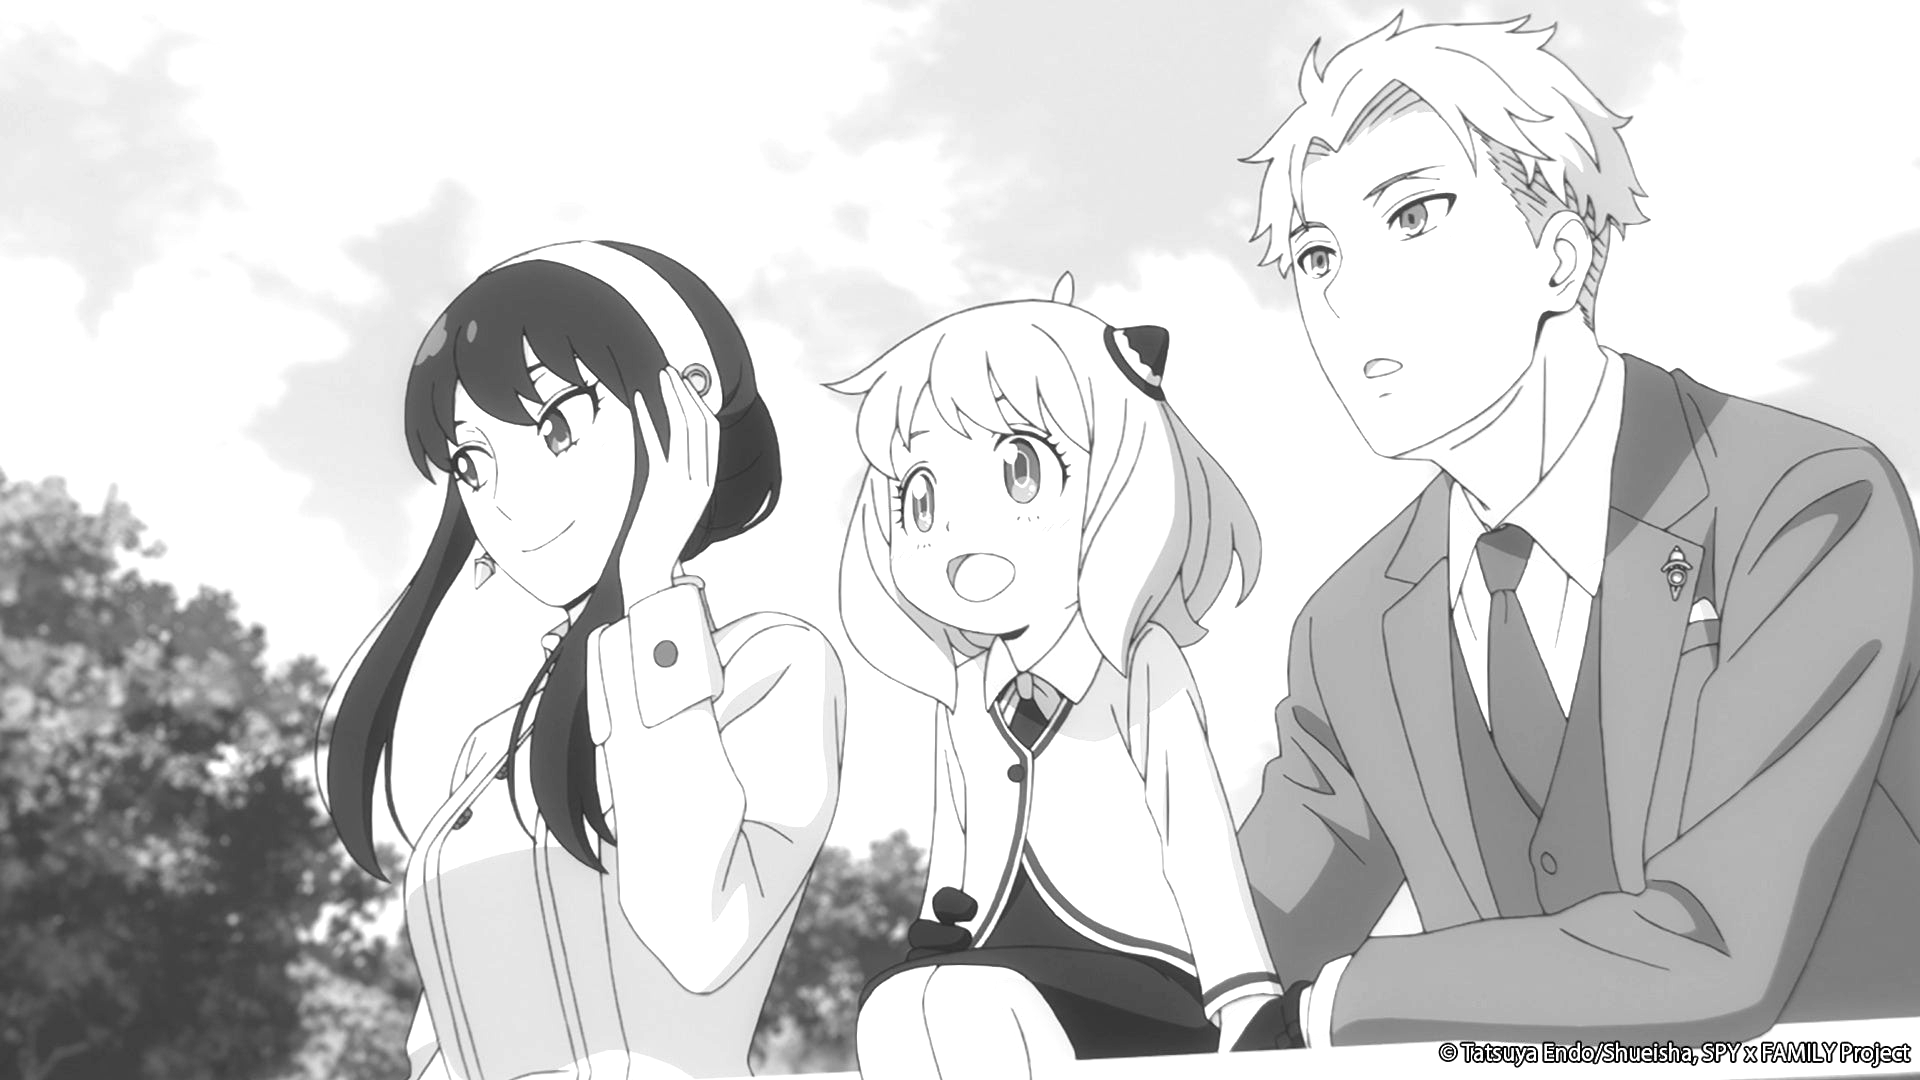

In [ ]:
# Como está demasiado gris, la aclaro para realzar los blancos
# Para ello, he usado la técnica de normalización probando con valores doistintos hasta conseguir un equilibrio sin perder los contornos
image_norm=cv2.normalize(grey_img, None, alpha=0, beta=350, norm_type=cv2.NORM_MINMAX)
cv2_imshow(image_norm)
cv2.waitKey(0)
cv2.destroyAllWindows()

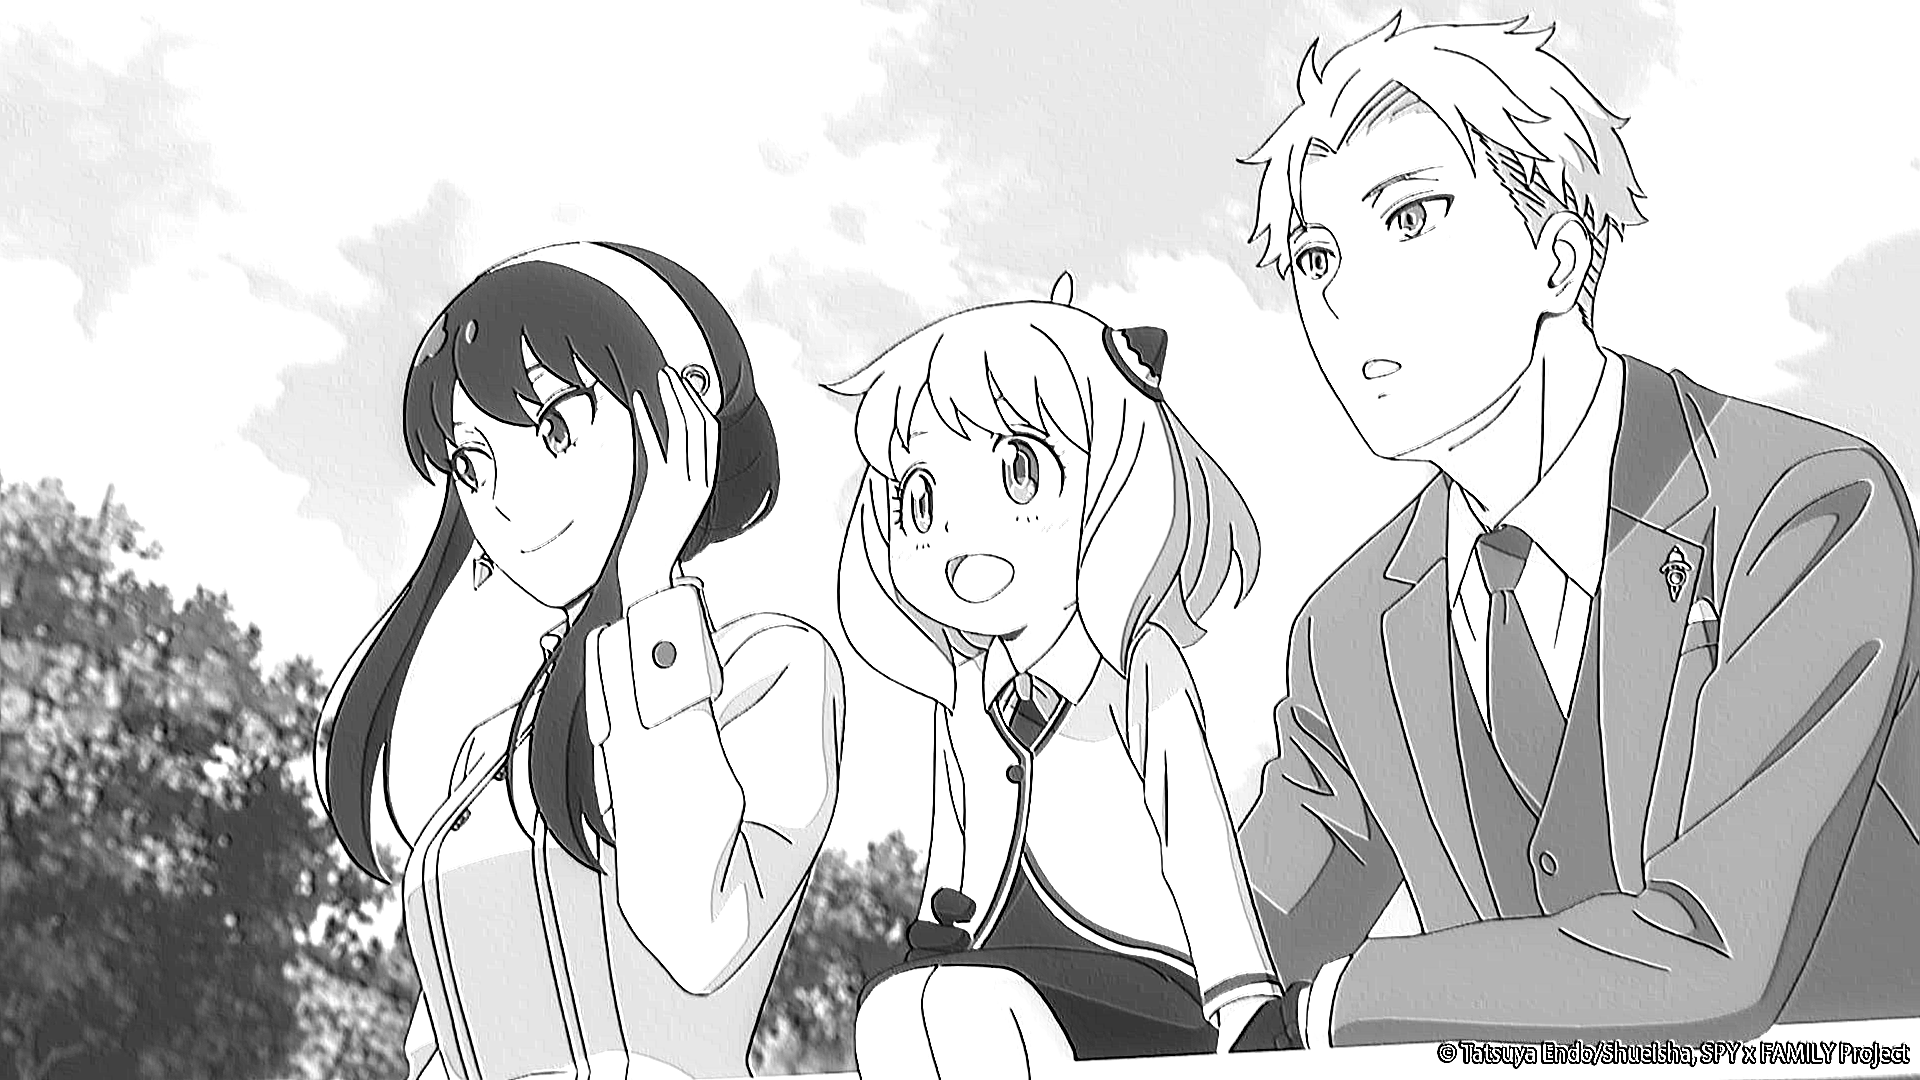

In [ ]:
# Ahora necesito resaltar los contornos
# Partiendo de la imagen conseguida en el paso anterior, le pasamos un kernel a la normalización y comprobamos cómo va quedando
a=[ [ -1.0, 0.5, 2.0 ], [ -1.0, 0.5, 1.0 ], [ -1.0, -1.0, 1.0 ] ]
kernel=np.asarray(a)
dst=cv2.filter2D(image_norm, -1, kernel)
norm=cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(norm)

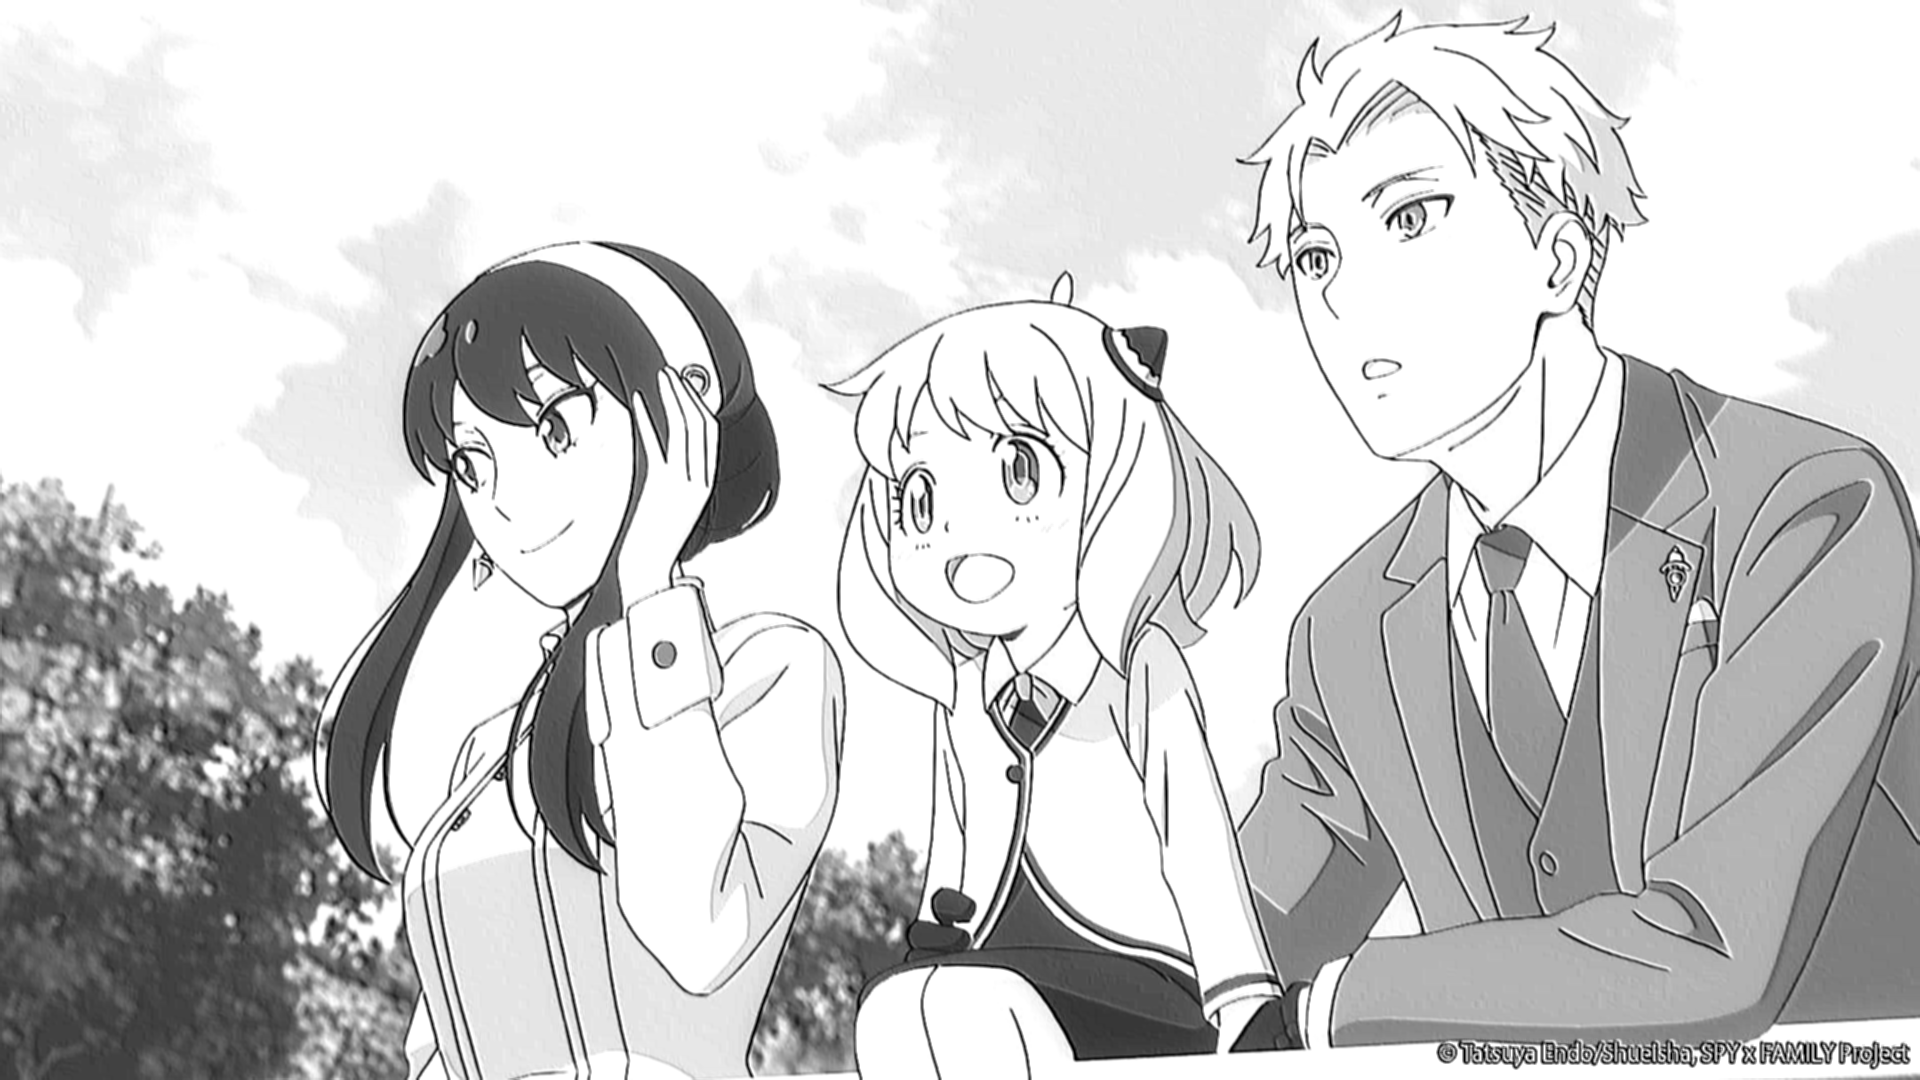

In [ ]:
# Vamos por buen camino, ahora le aplicamos un filtro para difuminar los bordes para unificar los tonos y quitar el ruido
blur=cv2.blur(norm,(3,3))
cv2_imshow(blur)

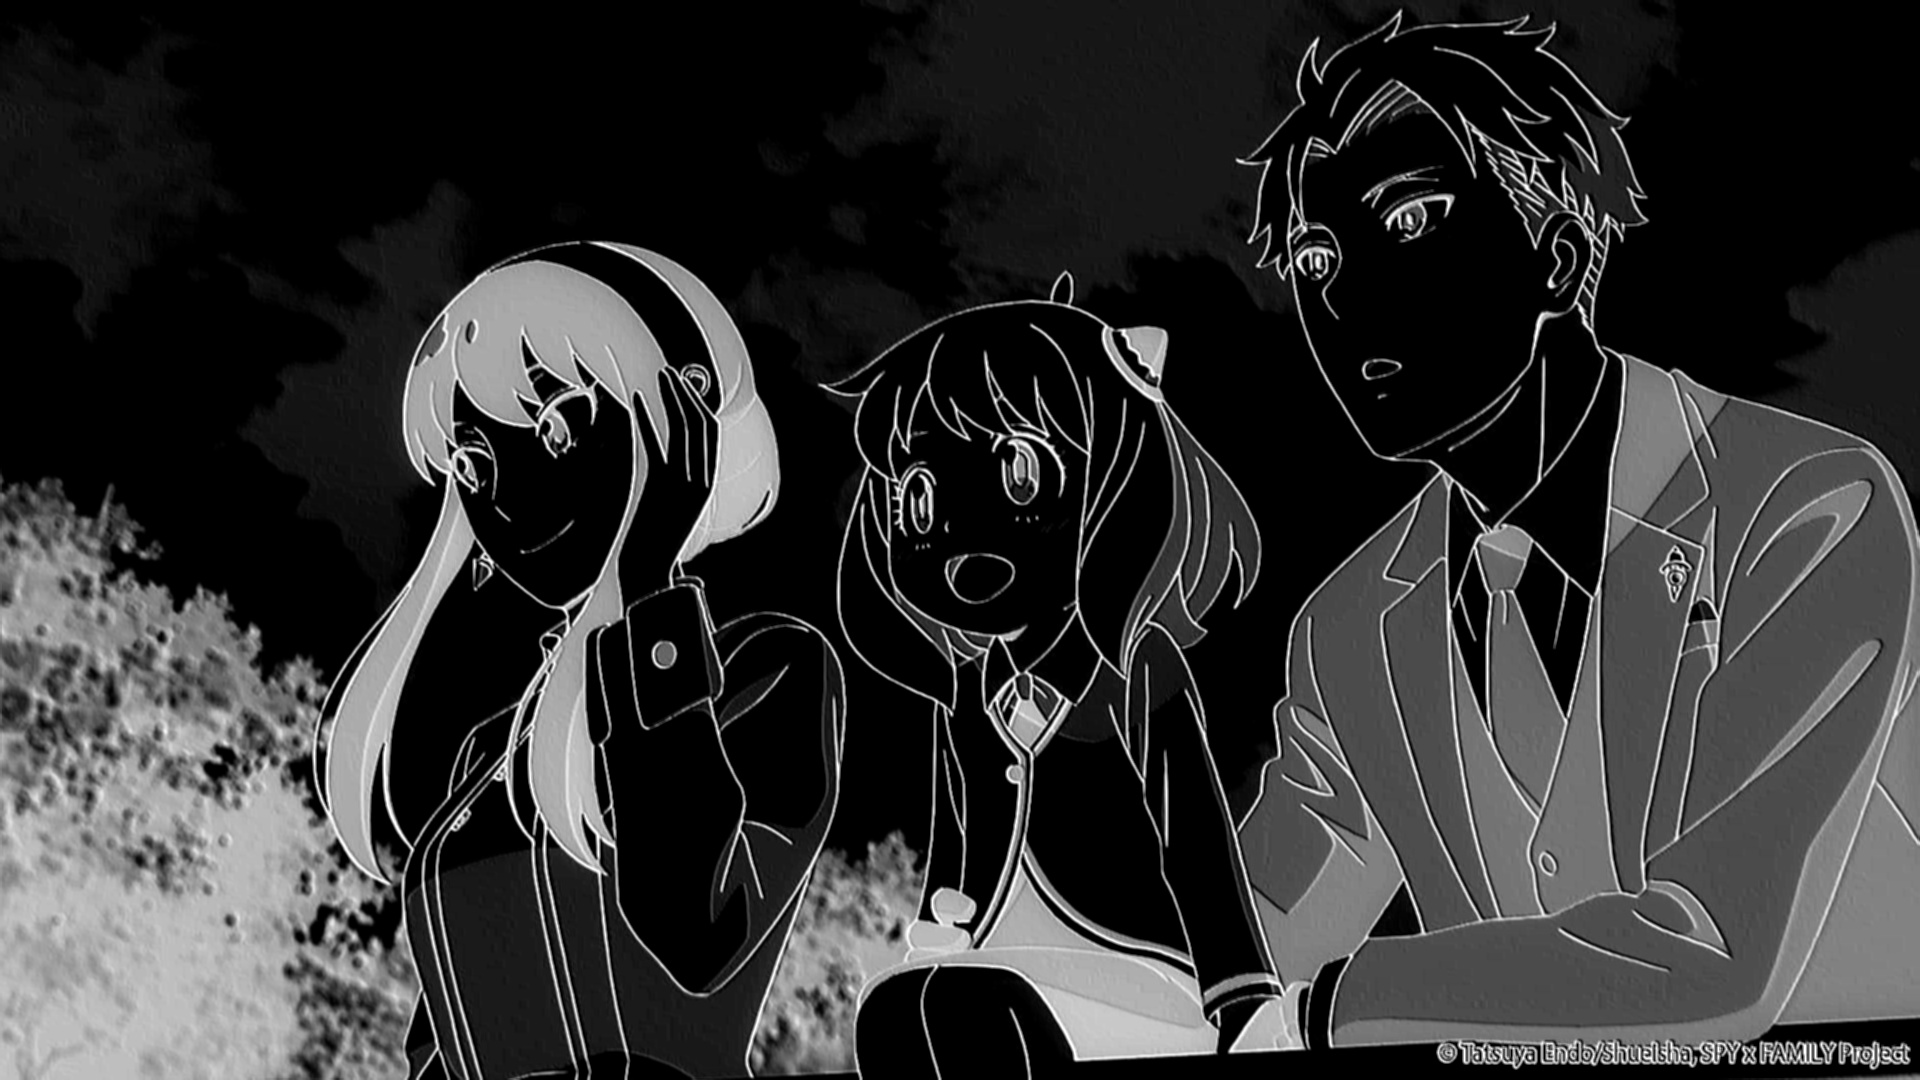

In [ ]:
# Ahora invertimos la imagen anterior para seguir retocándola
# Nuestro objetivo ahora es realzar el negro del pelo de la chica de la izquierda
invert_img=cv2.bitwise_not(blur)
cv2_imshow(invert_img)

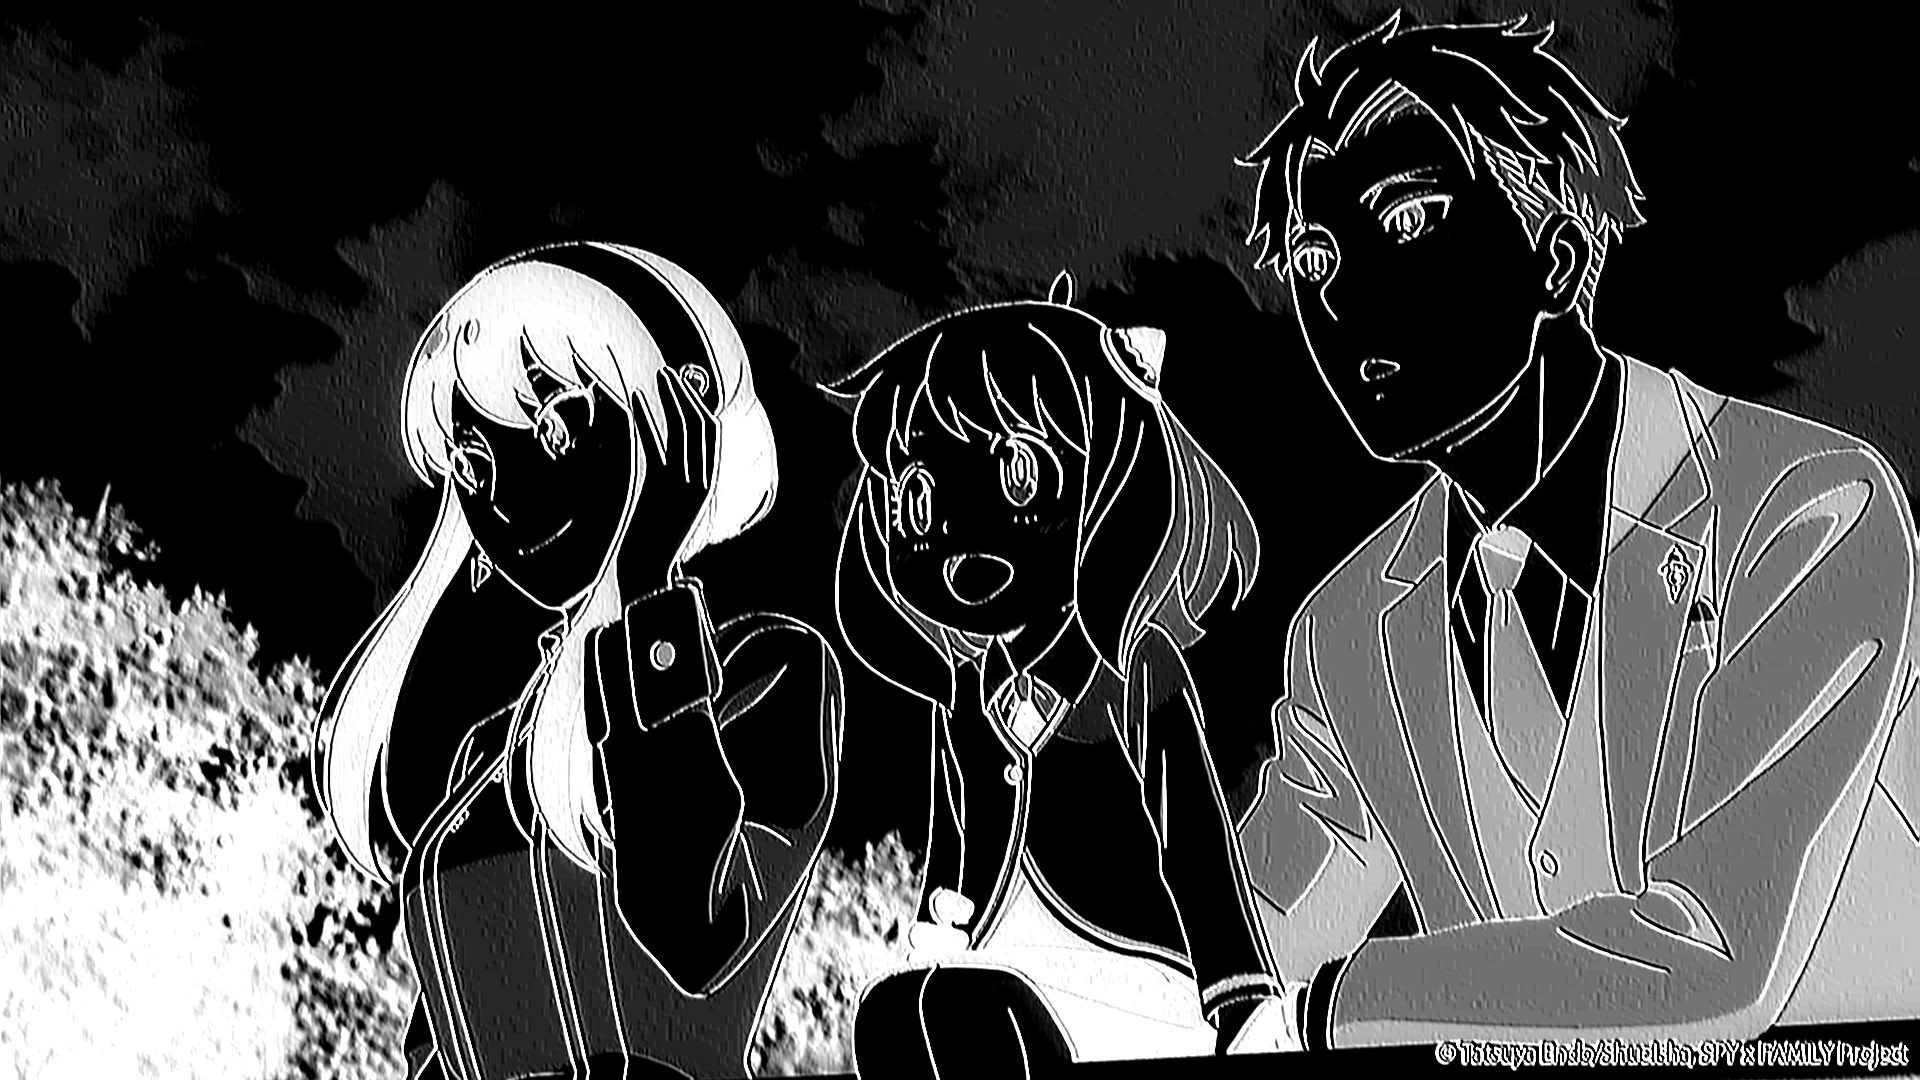

In [ ]:
# Aquí volvemos a aplicar la técnica de normalización con kernel para conseguir tonos monocromáticos más intensos
# Es decir: los blancos más blancos y los negros más negros
a=[ [ -1.0, 0.0, 2.5 ], [ -1.0, 0.0, 1.0 ], [ -1.0, 0.0, 1.0 ] ]
kernel=np.asarray(a)
dst=cv2.filter2D(invert_img, -1, kernel)
norm2=cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(norm2)

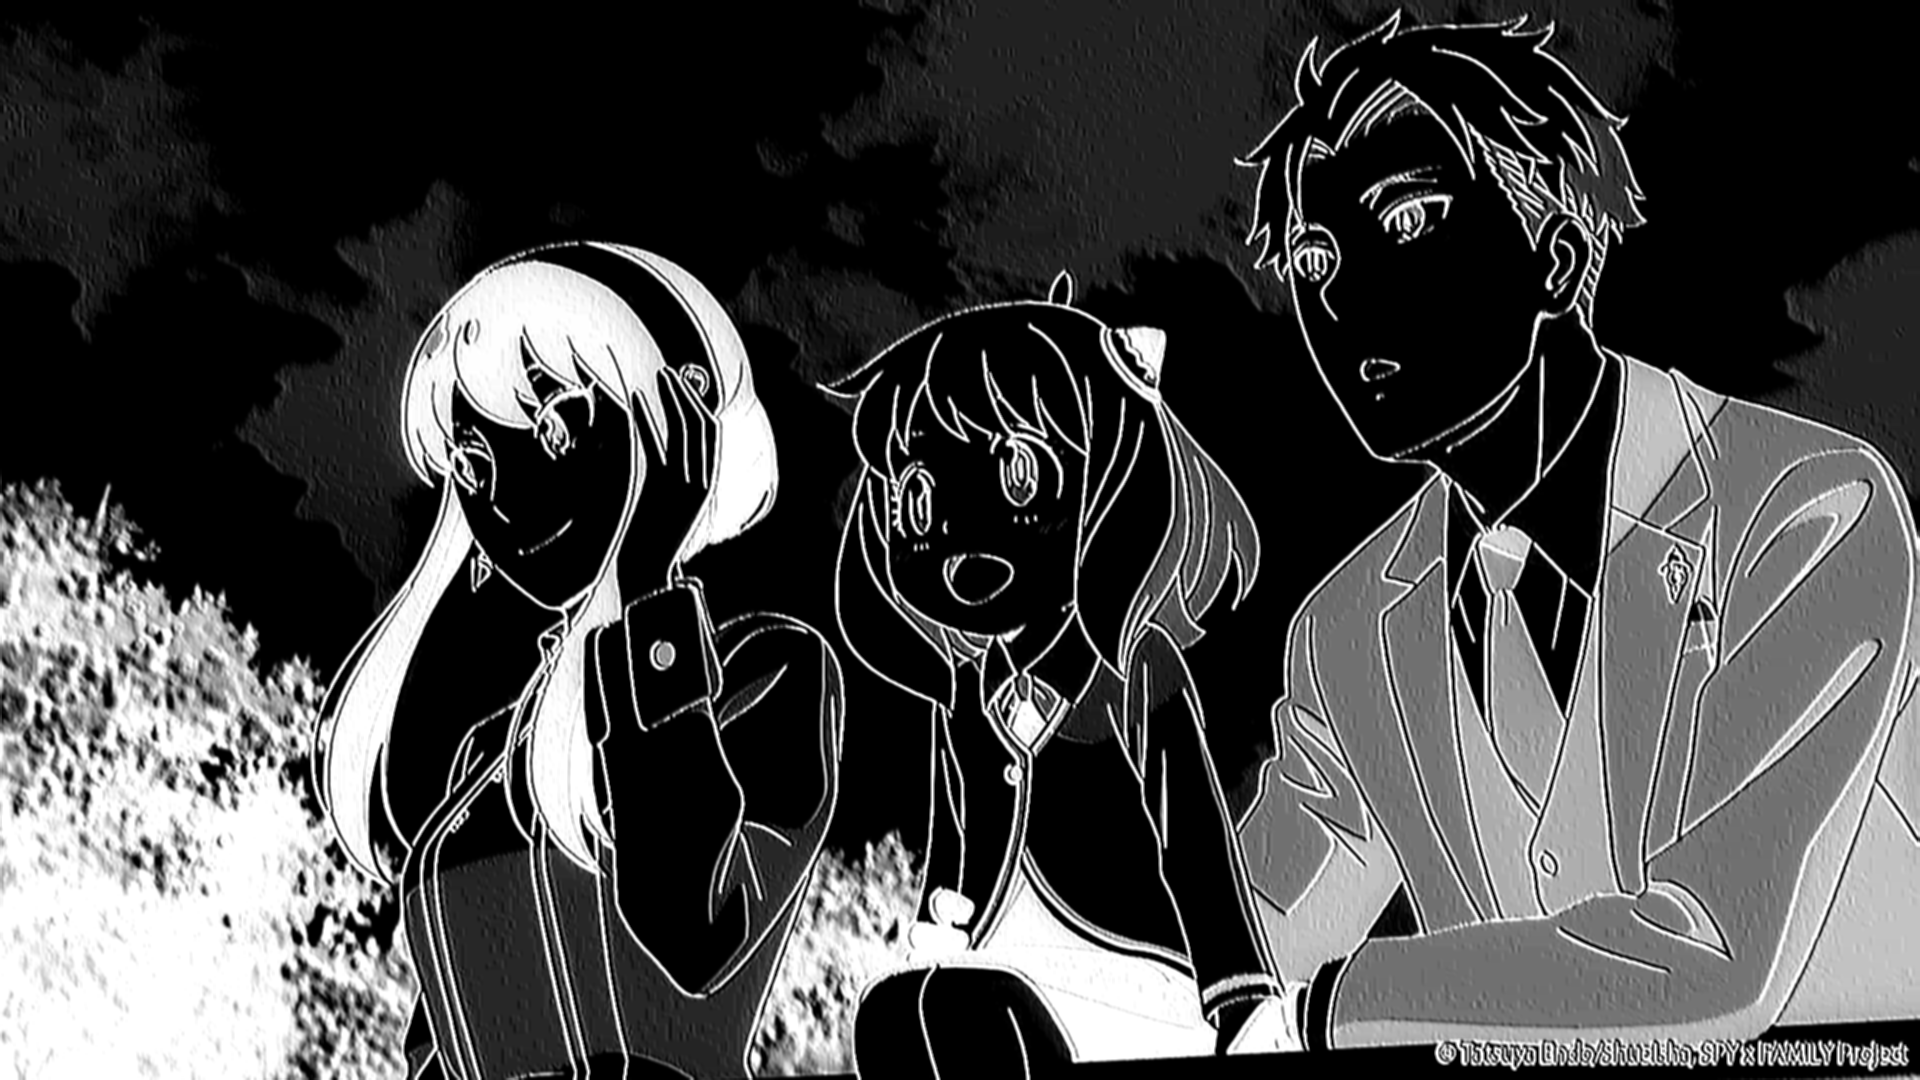

In [ ]:
# Y volvemos a difuminar para suavizarla un poco más
blur2=cv2.blur(norm2,(3,3))
cv2_imshow(blur2)

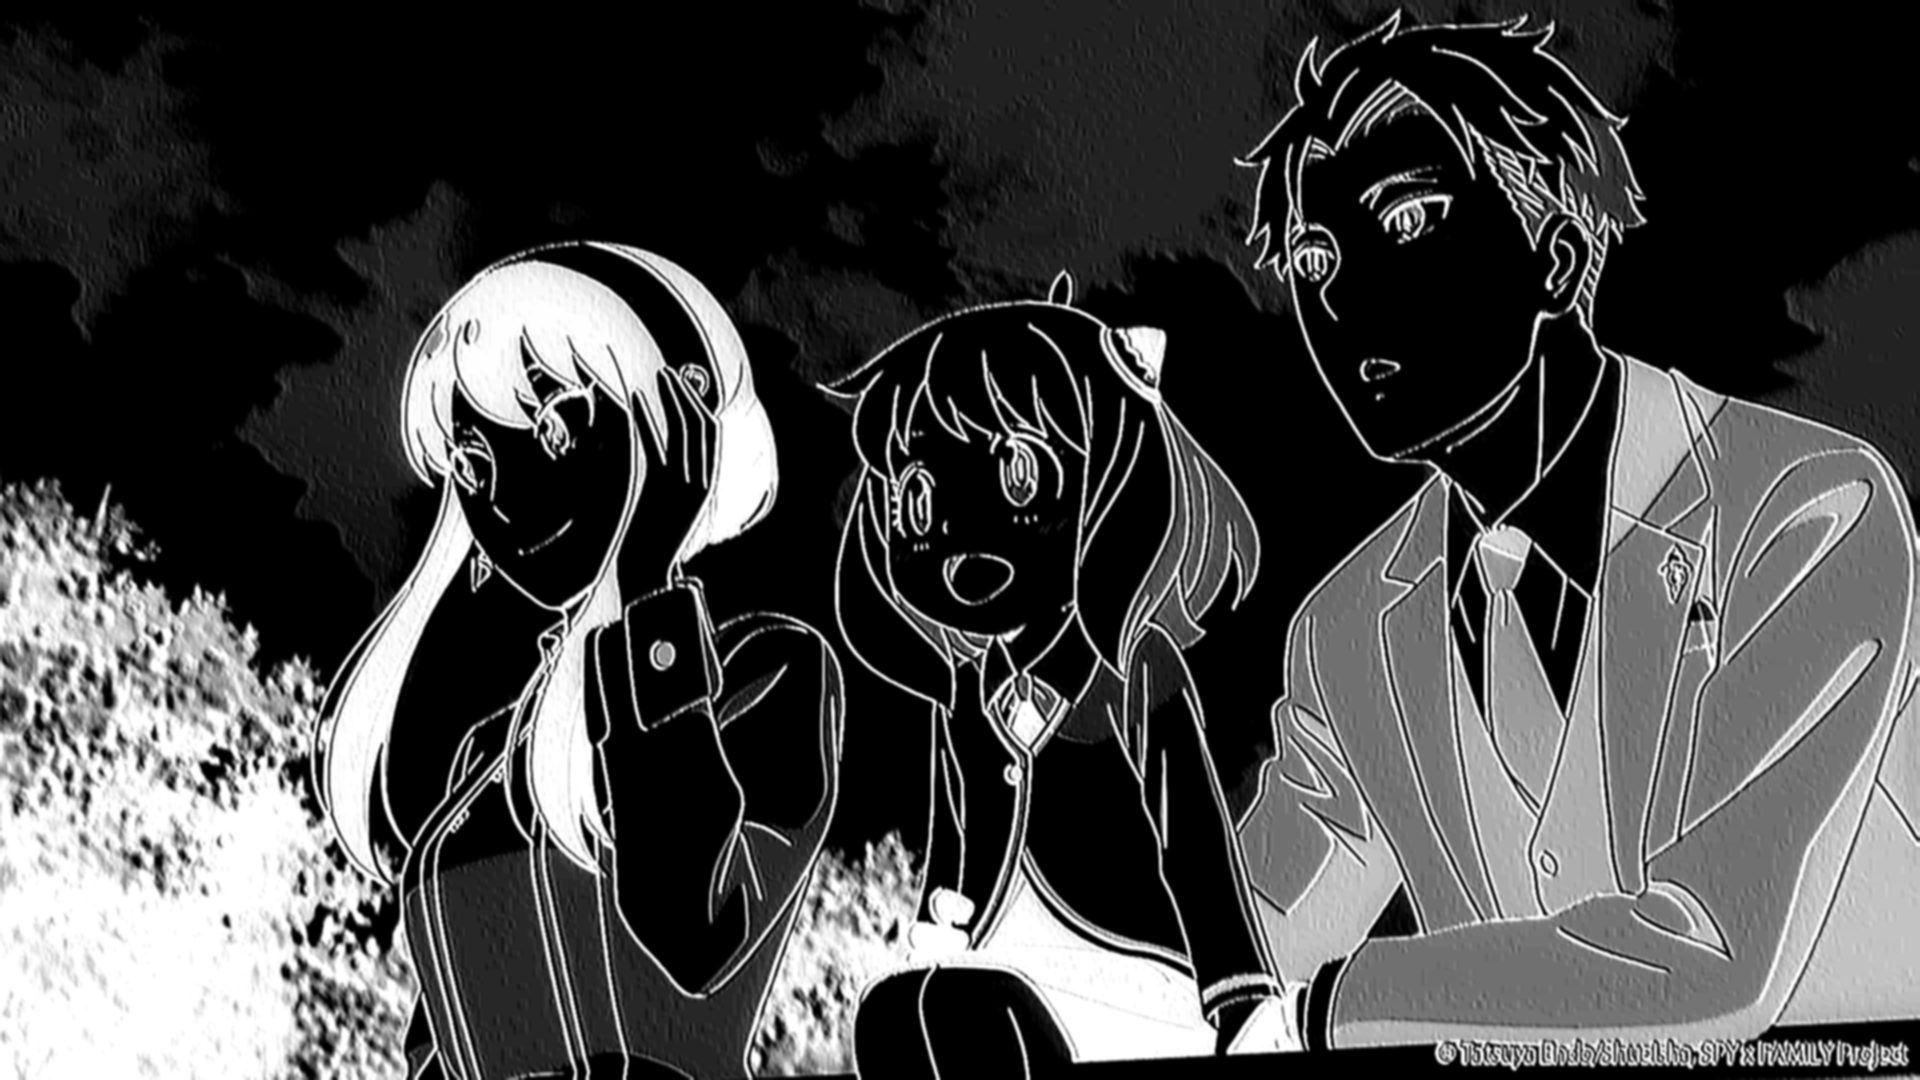

In [ ]:
# Aplicamos un filtro gaussiano para matizar más los tonos antes de volver a invertirla para verla "en positivo"
gaussblur=cv2.GaussianBlur(blur2,(3,3),0)
cv2_imshow(gaussblur)

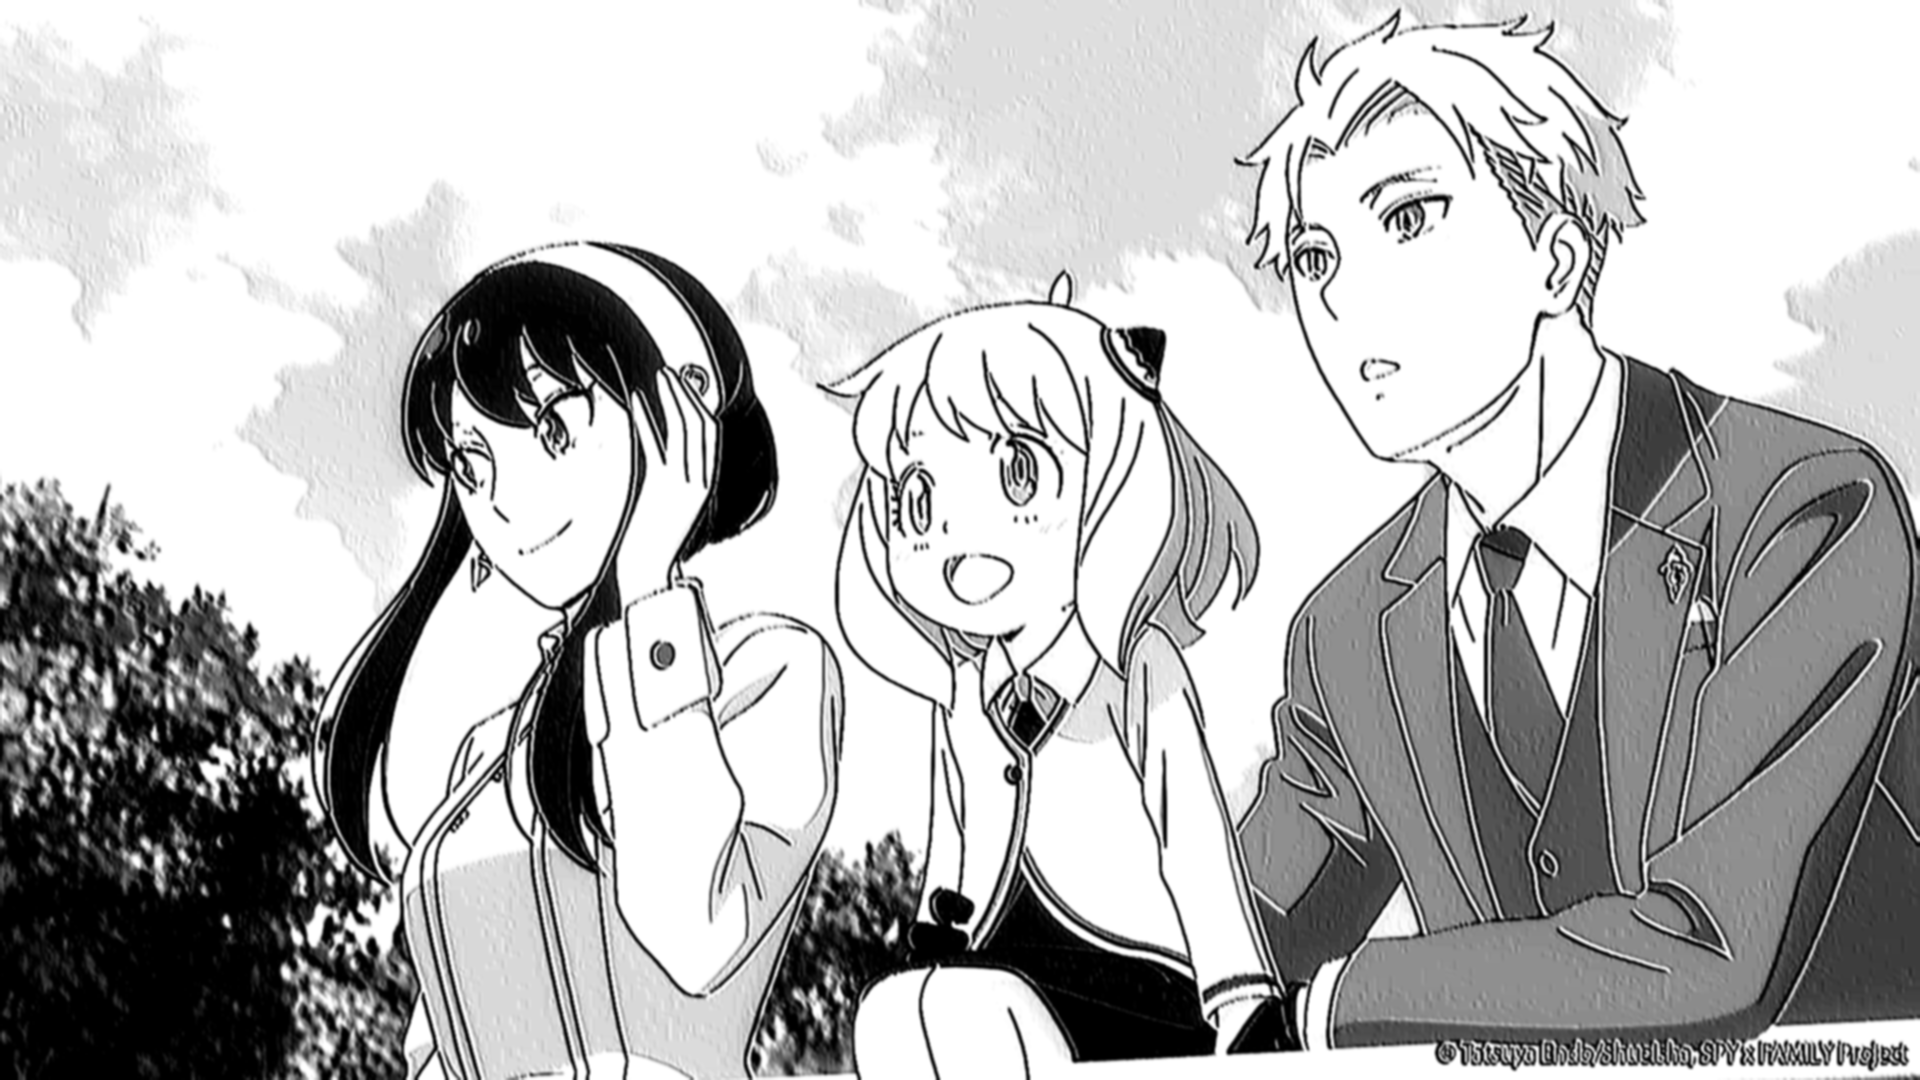

In [ ]:
# La invertimos y vemos cómo va quedando, ahora ya tenemos los tonos como queríamos
invert_gaussblur=cv2.bitwise_not(gaussblur)
cv2_imshow(invert_gaussblur)

In [ ]:
# No está mal, pero es demasiado grande, por ello creamos una función para redimensionarla

In [ ]:
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    """
    Función que cambia el tamaño de una imagen preservando la relación de aspecto.
    :param image: Imagen a ser alterada.
    :param width: Ancho objetivo (opcional).
    :param height: Altura objetivo (opcional).
    :param inter: Método de interpolación (por defecto: cv2.INTER_AREA)
    :return: Imagen redimensionada. Se le da prioridad a *height*, por lo que si se especifican tanto *width* como *height*, *width* será ignorado.
    """
    # Extraemos las dimensiones originales
    (original_height, original_width) = image.shape[:2]

    # Si no se especifica al menos uno de los parámetros, no tenemos nada que hacer aparte de retornar
    if width is None and height is None:
        return image

    # Si el nuevo ancho es vacío (*width*), calcularemos la relación de aspecto con base a la nueva altura (*height*)
    if width is None:
        # Proporción para mantener la relación de aspecto con base a la nueva altura
        ratio = height / float(original_height)

        # Nueva anchura
        width = int(original_width * ratio)
    else:
        # Proporción para mantener la relación de aspecto con base a la nueva anchura
        ratio = width / float(original_width)

        # Nueva altura
        height = int(original_height * ratio)

    # El nuevo tamaño de la imagen no será más que un par compuesta por la nueva anchura y la nueva altura
    new_size = (width, height)

    # Usamos la función cv2.resize() para llevar a cabo el cambio de tamaño de la imagen; finalmente retornamos el
    # resultado
    return cv2.resize(image, new_size, interpolation=inter)

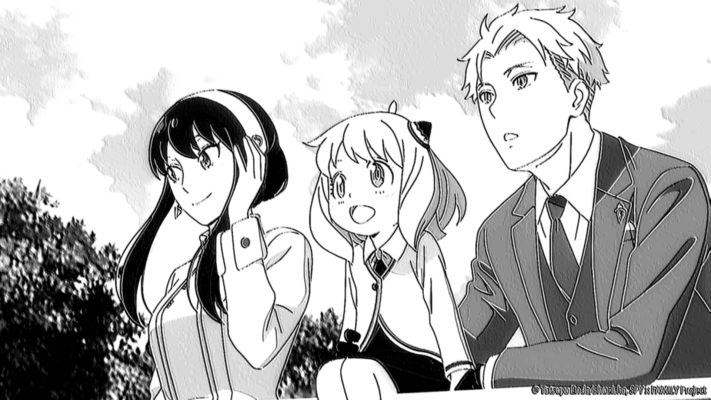

-1

In [ ]:
# Cambiamos las medidas a la imagen modificada
resized=resize(invert_gaussblur, height=400)
#print(f'Dimensiones: {resized.shape[:2]}')
cv2_imshow(resized)
cv2.waitKey(0)

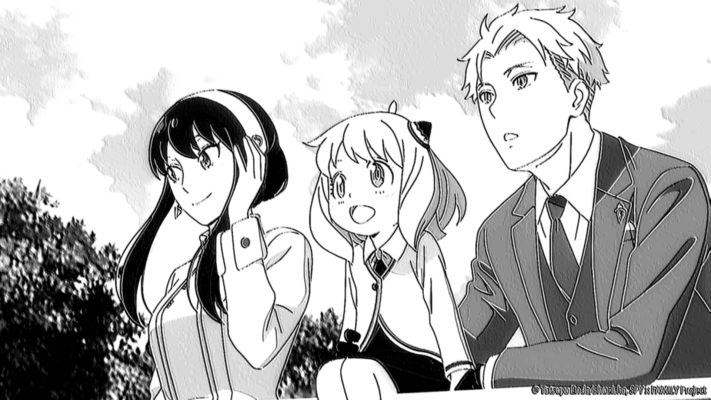

In [ ]:
# Por último aplicamos un filtro de medias...
median=cv2.medianBlur(resized,1)
cv2_imshow(median)

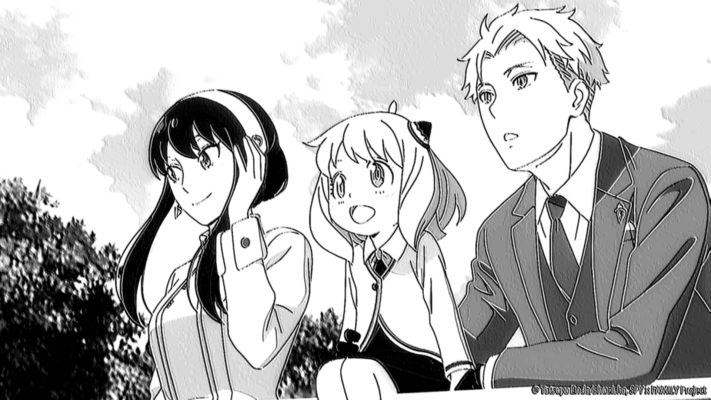

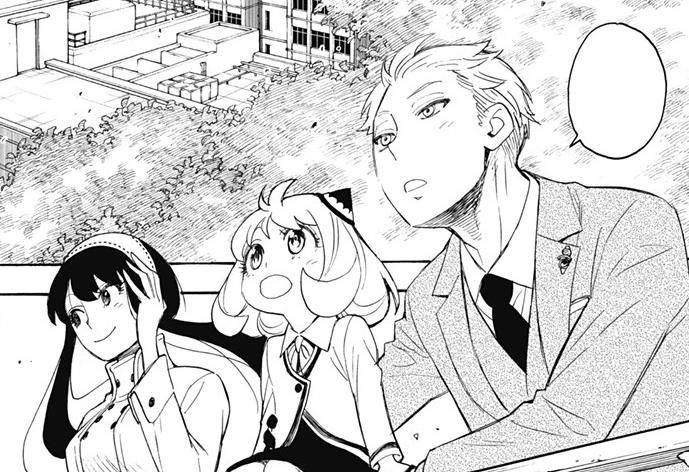

In [ ]:
# ...y comparamos las imágenes
cv2_imshow(median)
cv2_imshow(imgmanga)